In [124]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
pd.options.display.max_rows=10
%matplotlib inline

In [125]:
import glob
import io

TEST_RESULT_FILES_PATTERN = "/Users/esteele/tmp/wifi-test/root/wifi-test-results/test-run-{0}/*.csv"


def get_test_run_results(test_run_id):
    test_result_files_glob = TEST_RESULT_FILES_PATTERN.format(test_run_id)
    result_sio = io.StringIO()
    for csv in glob.iglob(test_result_files_glob):
        with open(csv) as f:
            result_sio.write(f.read())
    
    # Prime for reading
    result_sio.seek(0)
    return result_sio

In [126]:
#raw_run_data = "/Users/esteele/tmp/wifi-test/root/summary_1_client_15_parallel_300kbps.csv"
raw_run_data = get_test_run_results(8868158)
summary_data = pd.read_csv(raw_run_data, comment="#", names=["client_id","timestamp","bytes_per_sec"])

In [127]:
# Create a time_offset column
summary_data["time_offset"] = summary_data["timestamp"] - min(summary_data["timestamp"])
summary_data.head()

,client_id,timestamp,bytes_per_sec,time_offset
0,client1.wifi-test_11321,1495339571,371451,0
1,client1.wifi-test_11321,1495339572,744272,1
2,client1.wifi-test_11321,1495339573,595128,2
3,client1.wifi-test_11321,1495339574,660288,3
4,client1.wifi-test_11321,1495339575,673320,4


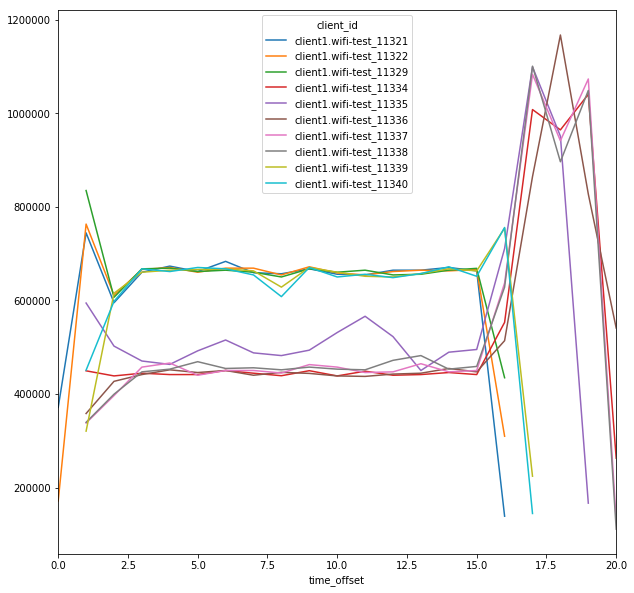

In [128]:
pivot_df = summary_data.pivot(index="time_offset", columns="client_id", values="bytes_per_sec")
pivot_df.plot(figsize=(10,10))